**NAME - Peesari**

In [ ]:
pip install wbgapi

In [10]:
import pandas as pd
import wbgapi as wb
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from numpy import array, exp
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ecnmy = ['NE.IMP.GNFS.ZS','NY.GDP.MKTP.PP.CD']
contry = ["JPN","AUS",'JAM','PAK','CHE','IND','CHL','GBR','LUX','BGR']
clim=['EN.ATM.CO2E.PC','EN.ATM.GHGT.KT.CE']
dat_ecnmy  = wb.data.DataFrame(ecnmy, contry, mrv=6)
dat_clim = wb.data.DataFrame(clim, contry, mrv=6)
#NE.IMP.GNFS.ZS: Import
#NY.GDP.MKTP.PP.CD: GDP, PPP basis
#EN.ATM.CO2E.PC: CO2 emissions calculated in metric tons per capita
#EN.ATM.GHGT.KT.CE: Greenhouse gas emission

In [3]:
# Ecnmy of countries
dat_ecnmy.columns = [a.replace('YR','') for a in dat_ecnmy.columns]      
dat_ecnmy=dat_ecnmy.stack().unstack(level=1)                             
dat_ecnmy.index.names = ['Country_Code', 'Year']                           
dat_ecnmy.fillna(0)
dat_ecnmy.columns                                                     
dat_ecnmy.head(5)

series             NE.IMP.GNFS.ZS  NY.GDP.MKTP.PP.CD
Country_Code Year                                   
AUS          2015       21.556339       1.101457e+12
             2016       21.547899       1.143149e+12
             2017       20.714438       1.190694e+12
             2018       21.512513       1.253361e+12
             2019       21.675312       1.312637e+12

In [4]:
# CLIMATE of cnries
dat_clim.columns = [a.replace('YR','') for a in dat_clim.columns]      
dat_clim=dat_clim.stack().unstack(level=1)                             
dat_clim.index.names = ['Country_Code', 'Year']                           
dat_clim.fillna(0)
dat_clim.columns                                                     
dat_clim.head(5)

series             EN.ATM.CO2E.PC  EN.ATM.GHGT.KT.CE
Country_Code Year                                   
AUS          2013       16.398646           581890.0
             2014       15.755876           593500.0
             2015       15.786449           594580.0
             2016       15.872080           573390.0
             2017       15.738647           619790.0

In [5]:
#Cleaning dataset
a=dat_ecnmy.reset_index()
b=dat_clim.reset_index()
c=a.fillna(0)
d=b.fillna(0)

In [6]:
#Merging the dataframes
e = pd.merge(c, d)
e.head(8)

series,Country_Code,Year,NE.IMP.GNFS.ZS,NY.GDP.MKTP.PP.CD,EN.ATM.CO2E.PC,EN.ATM.GHGT.KT.CE
0,AUS,2015,21.556339,1.101457e+12,15.786449,594580.0
1,AUS,2016,21.547899,1.143149e+12,15.872080,573390.0
2,AUS,2017,20.714438,1.190694e+12,15.738647,619790.0
3,AUS,2018,21.512513,1.253361e+12,15.475516,615380.0
4,BGR,2015,62.900855,1.320171e+11,6.225976,57310.0
5,BGR,2016,58.963344,1.430866e+11,5.855926,54270.0
6,BGR,2017,62.682001,1.519202e+11,6.223902,56450.0
7,BGR,2018,63.155915,1.616873e+11,5.854773,53330.0


In [7]:
#Normalization of the dataset
f = e.iloc[:,2:]
e.iloc[:,2:] = (f-f.min())/ (f.max() - f.min())
e.head(10)

series,Country_Code,Year,NE.IMP.GNFS.ZS,NY.GDP.MKTP.PP.CD,EN.ATM.CO2E.PC,EN.ATM.GHGT.KT.CE
0,AUS,2015,0.042463,0.119507,0.984073,0.174046
1,AUS,2016,0.042406,0.124138,0.989703,0.167751
2,AUS,2017,0.036792,0.129418,0.980929,0.181535
3,AUS,2018,0.042168,0.136378,0.963628,0.180225
4,BGR,2015,0.320952,0.011839,0.355441,0.014443
5,BGR,2016,0.294430,0.013069,0.331109,0.013540
6,BGR,2017,0.319478,0.014050,0.355304,0.014188
7,BGR,2018,0.322670,0.015134,0.331033,0.013261
8,CHE,2015,0.238941,0.057906,0.255918,0.011591
9,CHE,2016,0.261364,0.060512,0.257108,0.011734


In [8]:
#Clustering using K-means
e_v = e.drop('Country_Code', axis = 1)
km = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(e_v)

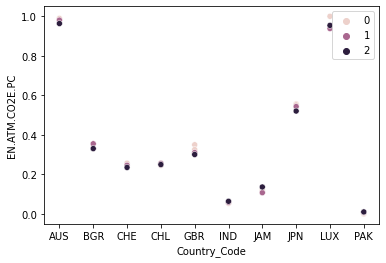

In [11]:
#Clustering based on carbon dioxide emission
sns.scatterplot(data=e, x="Country_Code", y="EN.ATM.CO2E.PC", hue=km.labels_)
plt.legend(loc='best')
plt.show()

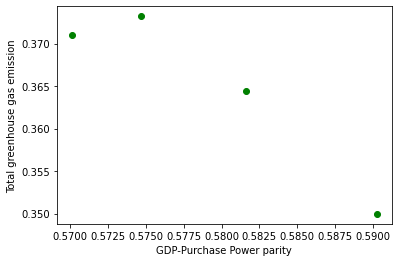

In [12]:
#Scatter plot for GDP, PPP vs greenshouse gas emission
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

t=e[(e['Country_Code']=='JPN')]
fn = t.values
x, y = fn[:, 3], fn[:, 5]

plt.scatter(x, y,color="green")

plt.ylabel('Total greenhouse gas emission')
plt.xlabel('GDP-Purchase Power parity')
plt.show()

The covariance is:  [[ 4.43453597e+02 -4.01081013e+00  8.99678182e-03]
 [-4.01081013e+00  3.63226120e-02 -8.15866593e-05]
 [ 8.99678182e-03 -8.15866593e-05  1.83523300e-07]]
The params is:  [ 3.62225206e+02 -3.23817227e+00  7.56060712e-03]


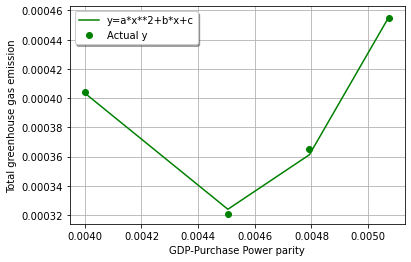

In [15]:
#Implementing the curve_fit function for Luxembourg with high carbon dioxide emissions calculated in metric tons per capita
t1=e[(e['Country_Code']=='LUX')]
fn1 = t1.values

x, y = fn1[:, 3], fn1[:, 5]
def funct(x, a, b, c):
    return a*x**2+b*x+c
par, cova = curve_fit(funct, x, y)
print("The covariance is: ", cova)
print("The params is: ", par)
par, _ = curve_fit(funct, x, y)
a, b, c = par[0], par[1], par[2]
yfit = a*x**2+b*x+c

import warnings

with warnings.catch_warnings(record=True):
    plt.plot(x, yfit, label="y=a*x**2+b*x+c",color="green")
    plt.grid(True)
    plt.plot(x, y, 'bo', label="Actual y",color="green")
    plt.ylabel('Total greenhouse gas emission')
    plt.xlabel('GDP-Purchase Power parity')

    plt.legend(loc='best', fancybox=True, shadow=True)

    plt.show() 

The covariance is:  [[ 717.57172341 -832.8805006   241.63739919]
 [-832.8805006   966.74221363 -280.4805251 ]
 [ 241.63739919 -280.4805251    81.37767521]]
The params is:  [-65.59146993  75.00451338 -21.07007305]


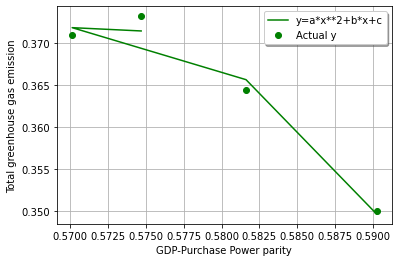

In [13]:
#Implementing the curve_fit function for Japan with medium carbon dioxide emissions calculated in metric tons per capita
x, y = fn[:, 3], fn[:, 5]
def funct(x, a, b, c):
    return a*x**2+b*x+c
par, cova = curve_fit(funct, x, y)
print("The covariance is: ", cova)
print("The params is: ", par)
par, _ = curve_fit(funct, x, y)
a, b, c = par[0], par[1], par[2]
yfit = a*x**2+b*x+c

import warnings

with warnings.catch_warnings(record=True):
    plt.plot(x, yfit, label="y=a*x**2+b*x+c",color="green")
    plt.grid(True)
    plt.plot(x, y, 'bo', label="Actual y",color="green")
    plt.ylabel('Total greenhouse gas emission')
    plt.xlabel('GDP-Purchase Power parity')

    plt.legend(loc='best', fancybox=True, shadow=True)

    plt.show() 

The covariance is:  [[ 1.99756088e+02 -4.11562051e+01  2.11032838e+00]
 [-4.11562051e+01  8.48408323e+00 -4.35259389e-01]
 [ 2.11032838e+00 -4.35259389e-01  2.23417916e-02]]
The params is:  [-66.23932602  14.70060092  -0.6901669 ]


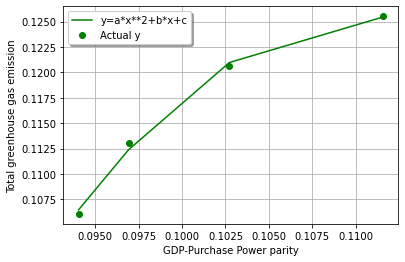

In [17]:
#Implementing the curve_fit function for Pakistan with low carbon dioxide emissions calculated in metric tons per capita
t2=e[(e['Country_Code']=='PAK')]
fn2 = t2.values

x, y = fn2[:, 3], fn2[:, 5]
def funct(x, a, b, c):
    return a*x**2+b*x+c
par, cova = curve_fit(funct, x, y)
print("The covariance is: ", cova)
print("The params is: ", par)
par, _ = curve_fit(funct, x, y)
a, b, c = par[0], par[1], par[2]
yfit = a*x**2+b*x+c

import warnings

with warnings.catch_warnings(record=True):
    plt.plot(x, yfit, label="y=a*x**2+b*x+c",color="green")
    plt.grid(True)
    plt.plot(x, y, 'bo', label="Actual y",color="green")
    plt.ylabel('Total greenhouse gas emission')
    plt.xlabel('GDP-Purchase Power parity')

    plt.legend(loc='best', fancybox=True, shadow=True)

    plt.show() 

**From the above line graph visualisations it can be concluded that for country with high carbon dioxide emissions, the relationship between total greenhouse emissions and purchase power parity, GDP is indirect at the beginning and after a certain value of purchase power parity, GDP the relationship is direct. For the country with medium carbon dioxide emissions,the relationship between total greenhouse emissions and purchase power parity, GDP is indirect. For the country with low carbon dioxide emissions the relationship between total greenhouse emissions and purchase power parity, GDP is direct.**

In [14]:
def err_ranges(x, func, param, sigma):
    import itertools as iter
    # initiate arrays for lower and upper limits
    lower = func(x, *param)
    upper = lower
    
    uplow = []   # list to hold upper and lower limits for parameters
    for p,s in zip(param, sigma):
        pmin = p - s
        pmax = p + s
        uplow.append((pmin, pmax))
        
    pmix = list(iter.product(*uplow))
    
    for p in pmix:
        y = func(x, *p)
        lower = np.minimum(lower, y)
        upper = np.maximum(upper, y)
        
    return lower, upper 